In [3]:
import os, geopandas as gpd

# Ruta absoluta al archivo SHP
ruta_archivo_shp = r"C:\Users\user\OneDrive - Softkey Digital\Aldo Mendoza Cotera\2024-1\Herramientas cuantitativas\Tarea 2_py\introgeodf\maps\World_Countries\World_Countries.shp"

# Leer el archivo SHP con geopandas
countries = gpd.read_file(ruta_archivo_shp)

In [4]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [5]:
countries.shape

(252, 2)

In [6]:
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [7]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [8]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [9]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

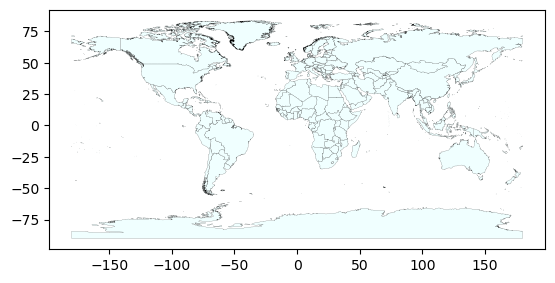

In [10]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

In [12]:
#Mapa de rios

ruta_archivo_shp_rivers = r"C:\Users\user\OneDrive - Softkey Digital\Aldo Mendoza Cotera\2024-1\Herramientas cuantitativas\Tarea 2_py\introgeodf\maps\World_Hydrography\World_Hydrography.shp"

rivers = gpd.read_file(ruta_archivo_shp_rivers)

#Mapa de ciudades

ruta_archivo_shp_cities = r"C:\Users\user\OneDrive - Softkey Digital\Aldo Mendoza Cotera\2024-1\Herramientas cuantitativas\Tarea 2_py\introgeodf\maps\World_Cities\World_Cities.shp"

cities = gpd.read_file(ruta_archivo_shp_cities)

<Axes: >

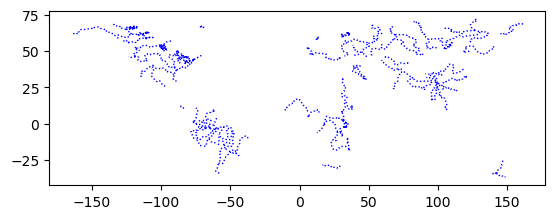

In [13]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

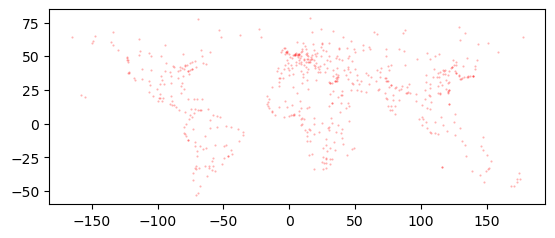

In [14]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

In [15]:
countries.crs==cities.crs==cities.crs

True

<Axes: >

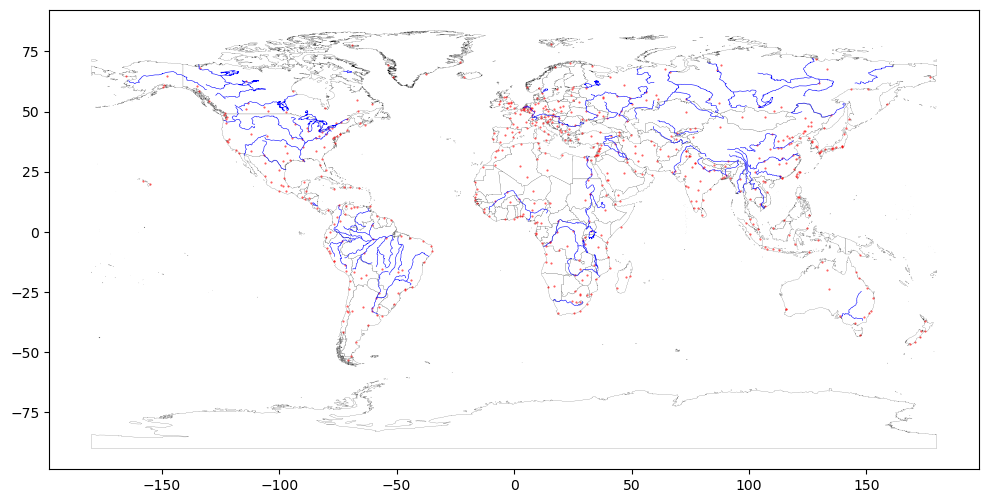

In [16]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...

In [17]:
# Rutas absolutas de los archivos de salida
ruta_archivo_gpkg = r"C:\Users\user\OneDrive - Softkey Digital\Aldo Mendoza Cotera\2024-1\Herramientas cuantitativas\Tarea 2_py\introgeodf\maps\worldMap.gpkg"

# Guardar los DataFrames de GeoPandas en un archivo Geopackage
countries.to_file(os.path.join(ruta_archivo_gpkg), layer='countryBorders', driver="GPKG")
rivers.to_file(os.path.join(ruta_archivo_gpkg), layer='riverLines', driver="GPKG")
cities.to_file(os.path.join(ruta_archivo_gpkg), layer='cityPoints', driver="GPKG")

In [18]:
#Subconjunto
peru=countries[countries.COUNTRY=='Peru']

In [19]:
citiesPeru_clipped = gpd.clip(gdf=cities,
                          mask=peru)
riversPeru_clipped = gpd.clip(gdf=rivers,
                               mask=peru)

<Axes: >

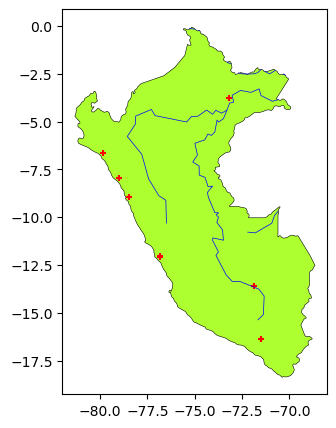

In [20]:
base = peru.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesPeru_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversPeru_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

In [21]:
peru.geom_type

172    Polygon
dtype: object

In [22]:
citiesPeru_clipped.geom_type

269    Point
339    Point
529    Point
317    Point
423    Point
260    Point
476    Point
422    Point
dtype: object

In [23]:
riversPeru_clipped.geom_type

59         LineString
1     MultiLineString
60    MultiLineString
85         LineString
65         LineString
dtype: object

In [24]:
# Proyeccion de mapas
# check units
peru.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [25]:
# centroid
peru.centroid

C:\Users\user\AppData\Local\Temp\ipykernel_16488\4264649780.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru.centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

In [26]:
#Reproyectando
# recommended for Peru (meters)
peru.to_crs(5641).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [27]:
# ahora esto funciona
peru.to_crs(5641).centroid

172    POINT (1511618.567 8973367.618)
dtype: geometry

<Axes: >

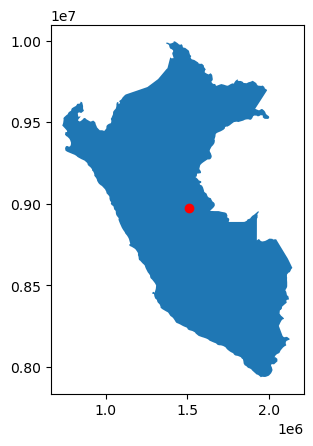

In [28]:
# volviendo a trazar:

base5641=peru.to_crs(5641).plot()
peru.to_crs(5641).centroid.plot(color='red',ax=base5641)

In [29]:
peru_5641=peru.to_crs(5641)

cities_peru_5641=citiesPeru_clipped.to_crs(peru_5641.crs)

rivers_peru_5641=riversPeru_clipped.to_crs(peru_5641.crs)

In [30]:
#Guardando
import os

ruta_peru_gpkg = r"C:\Users\user\OneDrive - Softkey Digital\Aldo Mendoza Cotera\2024-1\Herramientas cuantitativas\Tarea 2_py\introgeodf\maps\peruMaps_5641.gpkg"

peru_5641.to_file(os.path.join(ruta_peru_gpkg), layer='country', driver="GPKG")
cities_peru_5641.to_file(os.path.join(ruta_peru_gpkg), layer='cities', driver="GPKG")
rivers_peru_5641.to_file(os.path.join(ruta_peru_gpkg), layer='rivers', driver="GPKG")

In [31]:
peru_5641.centroid

172    POINT (1511618.567 8973367.618)
dtype: geometry

In [32]:
peru_5641.centroid.to_file(os.path.join(ruta_peru_gpkg), layer='centroid', driver="GPKG")

In [33]:
# Creando data espacial

import pandas as pd

ruta_airports_peru = r"C:\Users\user\OneDrive - Softkey Digital\Aldo Mendoza Cotera\2024-1\Herramientas cuantitativas\Tarea 2_py\pe-airports.csv"
infoairports=pd.read_csv(os.path.join(ruta_airports_peru))

# some rows
infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,6217,SPIM,large_airport,Jorge Chávez International Airport,-12.0219,-77.114305,113,SA,Peru,PE,...,Lima,1,SPJC,LIM,NaN,http://www.lap.com.pe/,https://en.wikipedia.org/wiki/Jorge_Ch%C3%A1ve...,"SPIM, SPJC",1050,2021-05-03T09:18:25+00:00
2,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535699844400002,-71.9387969971,10860,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
3,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.3411006927,-71.5830993652,8405,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
199,351487,PE-0013,heliport,Pucallpa Air Force Heliport,-8.3515,-74.5819,505,SA,Peru,PE,...,Pucallpa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:32:29+00:00
200,351489,PE-0015,heliport,Puerto Anapati Heliport,-11.92859,-73.9877,1496,SA,Peru,PE,...,Puerto Anapati,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:37:03+00:00
201,351491,PE-0017,heliport,Puerto Ocopa Heliport,-11.14793,-74.30629,1056,SA,Peru,PE,...,Puerto Ocopa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:40:40+00:00
202,351492,PE-0018,heliport,Tanquin Heliport,-12.12632,-74.07599,1880,SA,Peru,PE,...,Tanquin,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:42:05+00:00


In [34]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6217,SPIM,large_airport,Jorge Chávez International Airport,-12.0219,-77.114305,113,SA,Peru,PE,...,Lima,1,SPJC,LIM,NaN,http://www.lap.com.pe/,https://en.wikipedia.org/wiki/Jorge_Ch%C3%A1ve...,"SPIM, SPJC",1050,2021-05-03T09:18:25+00:00
1,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535699844400002,-71.9387969971,10860,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
2,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.3411006927,-71.5830993652,8405,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
3,6222,SPJL,medium_airport,Inca Manco Capac International Airport,-15.467100143432617,-70.158203125,12552,SA,Peru,PE,...,Juliaca,1,SPJL,JUL,NaN,NaN,https://en.wikipedia.org/wiki/Inca_Manco_Capac...,NaN,750,2008-07-21T16:57:31+00:00
4,6242,SPZA,medium_airport,Maria Reiche Neuman Airport,-14.854,-74.961502,1860,SA,Peru,PE,...,Nazca,1,SPZA,NZC,NaN,https://www.aeronasca.com/como-llegar-al-aerop...,https://en.wikipedia.org/wiki/Maria_Reiche_Neu...,NaN,750,2022-04-07T13:53:44+00:00


In [35]:
# keep the  columns needed

infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [36]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [37]:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           202 non-null    object
 1   type           202 non-null    object
 2   latitude_deg   202 non-null    object
 3   longitude_deg  202 non-null    object
 4   elevation_ft   190 non-null    object
 5   region_name    202 non-null    object
 6   municipality   195 non-null    object
dtypes: object(7)
memory usage: 11.2+ KB


In [38]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           202 non-null    object 
 1   type           202 non-null    object 
 2   latitude_deg   202 non-null    float64
 3   longitude_deg  202 non-null    float64
 4   elevation_ft   190 non-null    float64
 5   region_name    202 non-null    object 
 6   municipality   195 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.2+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

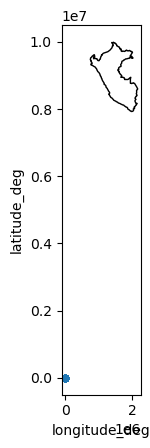

In [39]:
# let's plot

base = peru_5641.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [40]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=peru.crs.to_epsg()) # the coordinates were in degrees - unprojected

<Axes: >

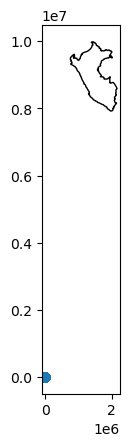

In [41]:
# does it look better?

# let's plot

base = peru_5641.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [42]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

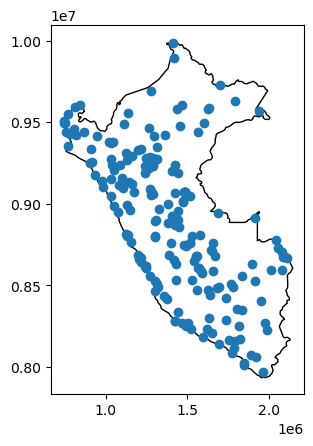

In [43]:
airports_5641=airports.to_crs(5641)

## then

base = peru_5641.plot(color='white', edgecolor='black')
airports_5641.plot(ax=base)

In [44]:
airports_5641['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     140
medium_airport     29
closed             25
heliport            6
large_airport       2
Name: count, dtype: int64

In [45]:
airports_5641.rename(columns={'type':'kind'},inplace=True)

In [46]:
# adding the airports
airports_5641.to_file(os.path.join(ruta_peru_gpkg), layer='airports', driver="GPKG")

In [47]:
# Fusion geografica
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


In [48]:
fragilityLink="https://github.com/SocialAnalytics-StrategicIntelligence/TableOperations/raw/main/dataFiles/fragility/fragilityCoded_2012_2023.pkl"

fragility=pd.read_pickle(fragilityLink)

fragility.head()

,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,P1_StateLegitimacy,P2_PublicServices,P3_HumanRights,S1_DemographicPressures,S2_RefugeesandIDPs,X1_ExternalIntervention,iso2,iso3,Total_mnmx
0,SOMALIA,2013,113.900000,9.7,10.0,9.3,9.4,8.4,8.9,9.500000,9.8,10.0,9.5,10.0,9.400000,SO,SOM,10.000000
1,SOMALIA,2023,111.900000,9.5,10.0,8.7,9.5,9.1,8.6,9.600000,9.8,9.0,10.0,9.0,9.100000,SO,SOM,10.000000
2,SOMALIA,2018,113.200796,9.7,10.0,9.0,8.9,9.3,9.5,9.119045,9.3,9.6,10.0,9.7,9.081752,SO,SOM,9.983597
3,SOMALIA,2014,112.600000,9.4,10.0,9.3,9.1,8.7,8.9,9.100000,9.6,9.8,9.5,10.0,9.200000,SO,SOM,9.968153
4,SOMALIA,2015,114.000000,9.7,10.0,9.5,9.1,9.0,9.2,9.300000,9.3,10.0,9.6,9.8,9.500000,SO,SOM,9.948347


In [49]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [50]:
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

In [51]:
onlyFragil

{'BRUNEI DARUSSALAM',
 'CONGO DEMOCRATIC REPUBLIC',
 'CONGO REPUBLIC',
 "COTE D'IVOIRE",
 'ESWATINI',
 'GUINEA BISSAU',
 'KYRGYZ REPUBLIC',
 'MICRONESIA',
 'SAMOA',
 'SLOVAK REPUBLIC',
 'TIMOR-LESTE'}

In [52]:
# and here
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAYMAN ISLANDS (UK)',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'EAST TIMOR',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'GUINEA-BISSAU',
 'HEARD ISLAND & MCDONALD ISLANDS (AUSTRALIA)',
 'HOWLAND ISLAND (US)',
 'ISLE OF MAN (UK)',
 'IVORY COAST',
 'JAN MAYEN (NORWAY)',

In [54]:
# Fusion difusa
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO REPUBLIC', ('CONGO', 90)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('KYRGYZ REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 86)),
 ('MICRONESIA', ('FEDERATED STATES OF MICRONESIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SLOVAK REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [55]:
# subsetting
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil) 
 if process.extractOne(country,onlyMap)[1]>=90]

[('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO REPUBLIC', ('CONGO', 90)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('MICRONESIA', ('FEDERATED STATES OF MICRONESIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90))]

In [56]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragil) 
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BRUNEI DARUSSALAM': 'BRUNEI',
 'CONGO DEMOCRATIC REPUBLIC': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO REPUBLIC': 'CONGO',
 'GUINEA BISSAU': 'GUINEA-BISSAU',
 'MICRONESIA': 'FEDERATED STATES OF MICRONESIA',
 'SAMOA': 'AMERICAN SAMOA (US)'}

In [57]:
fragility.Country.replace(try1,inplace=True)

# updating
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('KYRGYZ REPUBLIC', ('KYRGYZSTAN', 68)),
 ('SLOVAK REPUBLIC', ('SLOVAKIA', 77)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [58]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragil) 
 if process.extractOne(country,onlyMap)[1]!=60}
try2

{"COTE D'IVOIRE": 'IVORY COAST',
 'KYRGYZ REPUBLIC': 'KYRGYZSTAN',
 'SLOVAK REPUBLIC': 'SLOVAKIA',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [59]:
# changing
fragility.Country.replace(try2,inplace=True)

# new update
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[('ESWATINI', ('LIECHTENSTEIN', 60))]

In [60]:
fragility.Country.replace({'ESWATINI': 'SWAZILAND'},inplace=True)

#
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

# 
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[]

In [61]:
theMapAndData=countries.merge(fragility,left_on='COUNTRY', right_on='Country')
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Country                      1969 non-null   object  
 3   Year                         1969 non-null   int64   
 4   Total                        1969 non-null   float64 
 5   C1_SecurityApparatus         1969 non-null   float64 
 6   C2_FactionalizedElites       1969 non-null   float64 
 7   C3_GroupGrievance            1969 non-null   float64 
 8   E1_Economy                   1969 non-null   float64 
 9   E2_EconomicInequality        1969 non-null   float64 
 10  E3_HumanFlightandBrainDrain  1969 non-null   float64 
 11  P1_StateLegitimacy           1969 non-null   float64 
 12  P2_PublicServices            1969 non-null   float64 


In [62]:
# Mapas coropléticos
theMapAndData['Total_mnmx'].describe()

count    1969.000000
mean        5.336034
std         2.484143
min         0.000000
25%         3.545360
50%         5.707298
75%         7.111345
max        10.000000
Name: Total_mnmx, dtype: float64

<Axes: >

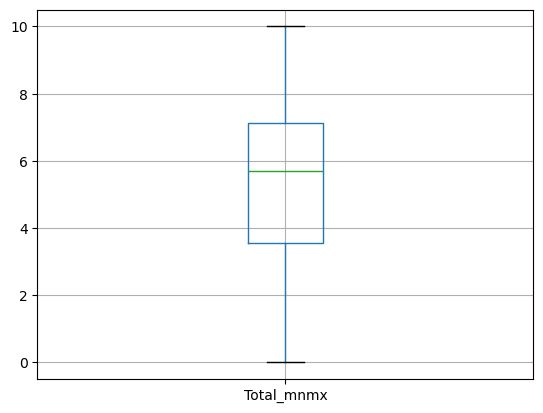

In [63]:
theMapAndData.boxplot(column=['Total_mnmx'])  

<Axes: >

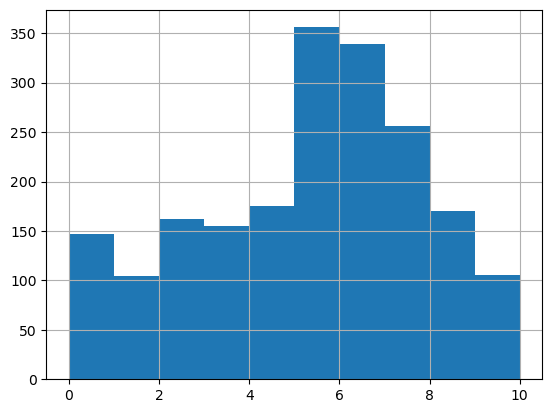

In [64]:
theMapAndData['Total_mnmx'].hist()

In [65]:
pip show numba pysal mapclassify numpy

Name: numba
Version: 0.59.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: llvmlite, numpy
Required-by: datashader, quantecon, segregation
---
Name: pysal
Version: 24.1
Summary: A library of spatial analysis functions.
Home-page: http://pysal.org
Author: 
Author-email: 
License: BSD
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: access, esda, giddy, inequality, libpysal, mapclassify, mgwr, momepy, pointpats, segregation, spaghetti, spglm, spint, splot, spopt, spreg, spvcm, tobler
Required-by: 
---
Name: mapclassify
Version: 2.6.1
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: pysal, segregation, splot, spopt
---
Name: numpy
Version: 1.26.4
Summary: Fundamental pa

In [66]:
import mapclassify 
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.Total_mnmx
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [67]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

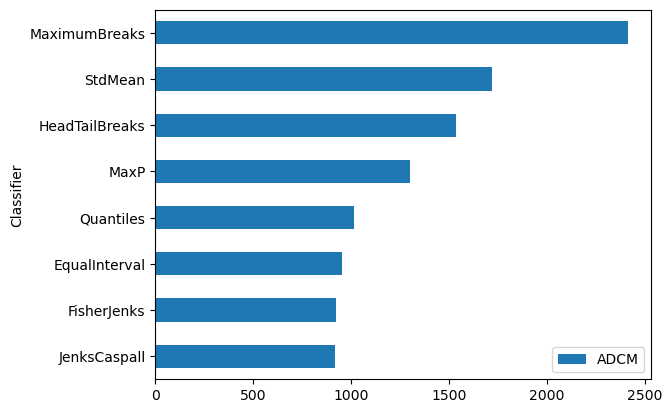

In [68]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [69]:
theMapAndData.loc[:,'Total_ei5'] = ei5.yb
theMapAndData.loc[:,'Total_fj5'] = fj5.yb
theMapAndData.loc[:,'Total_jc5'] = jc5.yb

In [70]:
# there you are
theMapAndData.head()

,COUNTRY,geometry,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,...,P3_HumanRights,S1_DemographicPressures,S2_RefugeesandIDPs,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2013,58.000000,4.9,3.7,4.1,4.5,5.6,...,4.400000,4.6,3.0,5.8,AG,ATG,4.171011,2,1,1
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2023,53.800000,4.9,3.7,3.6,6.6,5.1,...,3.800000,3.7,2.7,6.1,AG,ATG,4.034908,2,1,1
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2018,55.611041,5.7,3.7,3.6,4.8,4.2,...,4.411041,4.6,3.2,5.8,AG,ATG,3.948394,1,1,1
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2014,59.000000,4.9,3.7,4.1,4.5,5.3,...,4.700000,4.9,3.3,6.1,AG,ATG,4.278132,2,1,1
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2015,57.800000,5.2,3.7,3.9,5.0,5.0,...,4.500000,4.6,3.0,5.8,AG,ATG,4.142562,2,1,1


In [71]:
indexList=['Total_ei5','Total_fj5','Total_jc5']
aggregator={'Total_mnmx': ['mean']}

pd.concat([theMapAndData[['Total_mnmx',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,Total_ei5,Total_mnmx,Total_fj5,Total_mnmx,Total_jc5,Total_mnmx
,,mean,,mean,,mean
0,0,0.901965,0,0.937088,0,0.901965
1,1,3.027346,1,3.199770,1,3.193175
2,2,5.227688,2,5.433028,2,5.466820
3,3,6.906840,3,6.964059,3,6.940591
4,4,8.862077,4,8.766700,4,8.687480


In [72]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Country                      1969 non-null   object  
 3   Year                         1969 non-null   int64   
 4   Total                        1969 non-null   float64 
 5   C1_SecurityApparatus         1969 non-null   float64 
 6   C2_FactionalizedElites       1969 non-null   float64 
 7   C3_GroupGrievance            1969 non-null   float64 
 8   E1_Economy                   1969 non-null   float64 
 9   E2_EconomicInequality        1969 non-null   float64 
 10  E3_HumanFlightandBrainDrain  1969 non-null   float64 
 11  P1_StateLegitimacy           1969 non-null   float64 
 12  P2_PublicServices            1969 non-null   float64 


In [73]:
newColNames=[ name+"_cat" for name in indexList]

theMapAndData[newColNames]=theMapAndData.loc[:,indexList]
theMapAndData.head()

,COUNTRY,geometry,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,...,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2013,58.000000,4.9,3.7,4.1,4.5,5.6,...,5.8,AG,ATG,4.171011,2,1,1,2,1,1
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2023,53.800000,4.9,3.7,3.6,6.6,5.1,...,6.1,AG,ATG,4.034908,2,1,1,2,1,1
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2018,55.611041,5.7,3.7,3.6,4.8,4.2,...,5.8,AG,ATG,3.948394,1,1,1,1,1,1
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2014,59.000000,4.9,3.7,4.1,4.5,5.3,...,6.1,AG,ATG,4.278132,2,1,1,2,1,1
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2015,57.800000,5.2,3.7,3.9,5.0,5.0,...,5.8,AG,ATG,4.142562,2,1,1,2,1,1


In [74]:
# renombrando
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData[newColNames]=theMapAndData.loc[:,newColNames].replace(newLabelsForLevels)
theMapAndData.drop(columns=['Country'],inplace=True)
theMapAndData

,COUNTRY,geometry,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,...,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2013,58.000000,4.900000,3.7,4.1,4.5,5.6,7.6,...,5.8,AG,ATG,4.171011,2,1,1,2_Middle,1_Good,1_Good
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2023,53.800000,4.900000,3.7,3.6,6.6,5.1,6.2,...,6.1,AG,ATG,4.034908,2,1,1,2_Middle,1_Good,1_Good
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2018,55.611041,5.700000,3.7,3.6,4.8,4.2,6.7,...,5.8,AG,ATG,3.948394,1,1,1,1_Good,1_Good,1_Good
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2014,59.000000,4.900000,3.7,4.1,4.5,5.3,7.6,...,6.1,AG,ATG,4.278132,2,1,1,2_Middle,1_Good,1_Good
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2015,57.800000,5.200000,3.7,3.9,5.0,5.0,7.3,...,5.8,AG,ATG,4.142562,2,1,1,2_Middle,1_Good,1_Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2020,82.663114,6.463114,8.3,5.6,7.2,6.5,7.3,...,8.9,TL,TLS,6.955837,3,3,3,3_Bad,3_Bad,3_Bad
1965,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2016,90.800000,7.400000,8.3,6.7,8.1,7.0,7.3,...,9.0,TL,TLS,7.563025,3,3,3,3_Bad,3_Bad,3_Bad
1966,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2017,90.500000,7.200000,8.3,6.5,7.9,6.8,7.6,...,9.5,TL,TLS,7.542017,3,3,3,3_Bad,3_Bad,3_Bad
1967,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2021,80.900000,6.200000,8.3,5.3,7.7,6.2,7.0,...,8.6,TL,TLS,6.774869,3,3,3,3_Bad,3_Bad,3_Bad


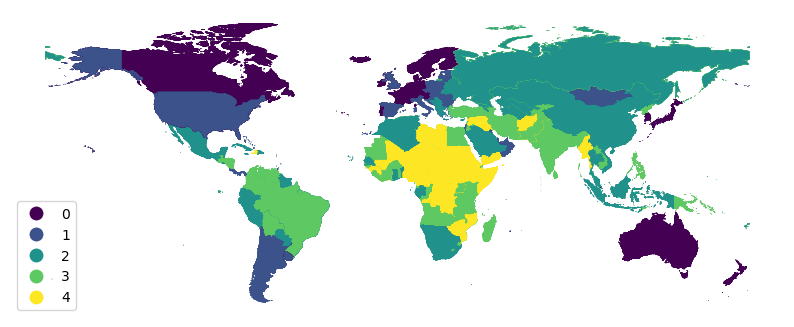

In [75]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"}, 
        ax=ax
       )

ax.set_axis_off()

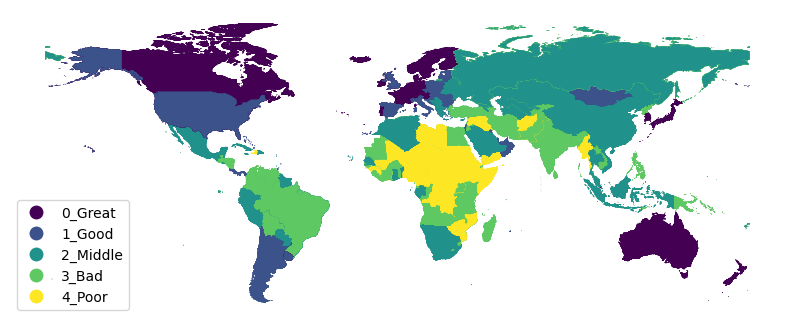

In [76]:
# alternatively:

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5_cat', # annotated
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=1, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

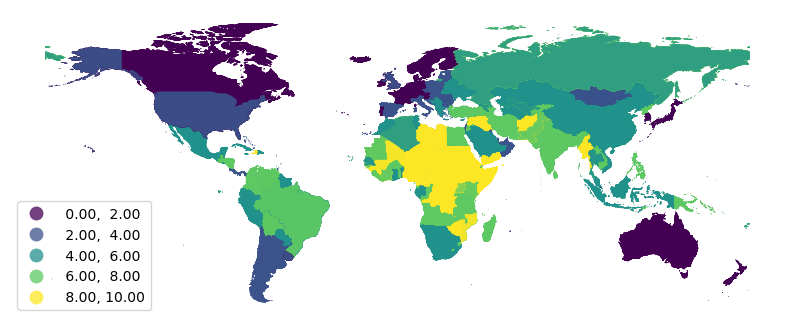

In [77]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_mnmx', 
        cmap='viridis', 
                   scheme="equal_interval",
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

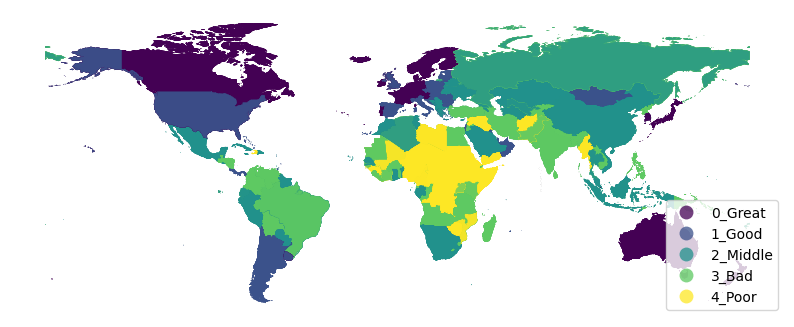

In [78]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5_cat', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':"lower right"},
        ax=ax
       )

ax.set_axis_off()

In [79]:
# Continentes

import pandas as pd

ruta_continentes = r"C:\Users\user\OneDrive - Softkey Digital\Aldo Mendoza Cotera\2024-1\Herramientas cuantitativas\Tarea 2_py\continents2.csv"
infocontinentes=pd.read_csv(os.path.join(ruta_continentes))

# some rows
infocontinentes.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
248,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [80]:
infocontinentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   alpha-3                   249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [81]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Year                         1969 non-null   int64   
 3   Total                        1969 non-null   float64 
 4   C1_SecurityApparatus         1969 non-null   float64 
 5   C2_FactionalizedElites       1969 non-null   float64 
 6   C3_GroupGrievance            1969 non-null   float64 
 7   E1_Economy                   1969 non-null   float64 
 8   E2_EconomicInequality        1969 non-null   float64 
 9   E3_HumanFlightandBrainDrain  1969 non-null   float64 
 10  P1_StateLegitimacy           1969 non-null   float64 
 11  P2_PublicServices            1969 non-null   float64 
 12  P3_HumanRights               1969 non-null   float64 


In [83]:
infocontinentes['name']=infocontinentes.name.str.upper()

In [84]:
infocontinentes.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,AFGHANISTAN,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,ÅLAND ISLANDS,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,ALBANIA,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,ALGERIA,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
245,WESTERN SAHARA,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,YEMEN,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,ZAMBIA,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
248,ZIMBABWE,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [85]:
import pandas as pd

# Suponiendo que 'theMapAndData' es tu GeoDataFrame y 'infocontinentes' es tu DataFrame de pandas
# Realizar la unión basada en las columnas 'COUNTRY' y 'name'
merged_df = pd.merge(theMapAndData, infocontinentes, left_on='COUNTRY', right_on='name', how='left')
merged_df

,COUNTRY,geometry,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2013,58.000000,4.900000,3.7,4.1,4.5,5.6,7.6,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2023,53.800000,4.900000,3.7,3.6,6.6,5.1,6.2,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2018,55.611041,5.700000,3.7,3.6,4.8,4.2,6.7,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2014,59.000000,4.900000,3.7,4.1,4.5,5.3,7.6,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2015,57.800000,5.200000,3.7,3.9,5.0,5.0,7.3,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2020,82.663114,6.463114,8.3,5.6,7.2,6.5,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2016,90.800000,7.400000,8.3,6.7,8.1,7.0,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2017,90.500000,7.200000,8.3,6.5,7.9,6.8,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2021,80.900000,6.200000,8.3,5.3,7.7,6.2,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
merged_df.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,COUNTRY,geometry,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2013,58.000000,4.9,3.7,4.1,4.5,5.6,7.6,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2023,53.800000,4.9,3.7,3.6,6.6,5.1,6.2,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2018,55.611041,5.7,3.7,3.6,4.8,4.2,6.7,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2014,59.000000,4.9,3.7,4.1,4.5,5.3,7.6,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
1965,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2016,90.800000,7.4,8.3,6.7,8.1,7.0,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2017,90.500000,7.2,8.3,6.5,7.9,6.8,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2021,80.900000,6.2,8.3,5.3,7.7,6.2,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2022,79.300000,5.9,8.3,5.3,7.4,6.1,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# Filtrar el DataFrame para quedarse solo con las observaciones donde 'region' sea igual a 'Americas'
americas_df = merged_df.loc[merged_df['region'] == 'Americas']
americas_df

,COUNTRY,geometry,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2013,58.000000,4.900000,3.700,4.1,4.5,5.6,7.600000,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2023,53.800000,4.900000,3.700,3.6,6.6,5.1,6.200000,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2018,55.611041,5.700000,3.700,3.6,4.8,4.2,6.700000,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2014,59.000000,4.900000,3.700,4.1,4.5,5.3,7.600000,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2015,57.800000,5.200000,3.700,3.9,5.0,5.0,7.300000,...,AG,ATG,28.0,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,VENEZUELA,"MULTIPOLYGON (((-60.25755 7.92157, -60.31973 7...",2020,91.157591,7.244253,9.152,7.3,8.7,6.6,6.350284,...,VE,VEN,862.0,ISO 3166-2:VE,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
1866,VENEZUELA,"MULTIPOLYGON (((-60.25755 7.92157, -60.31973 7...",2016,81.600000,6.800000,8.200,7.4,7.0,6.9,5.200000,...,VE,VEN,862.0,ISO 3166-2:VE,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
1867,VENEZUELA,"MULTIPOLYGON (((-60.25755 7.92157, -60.31973 7...",2017,82.900000,7.300000,8.200,7.2,7.3,6.7,5.500000,...,VE,VEN,862.0,ISO 3166-2:VE,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
1868,VENEZUELA,"MULTIPOLYGON (((-60.25755 7.92157, -60.31973 7...",2021,92.600000,7.300000,9.300,7.0,9.8,6.7,6.500000,...,VE,VEN,862.0,ISO 3166-2:VE,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0


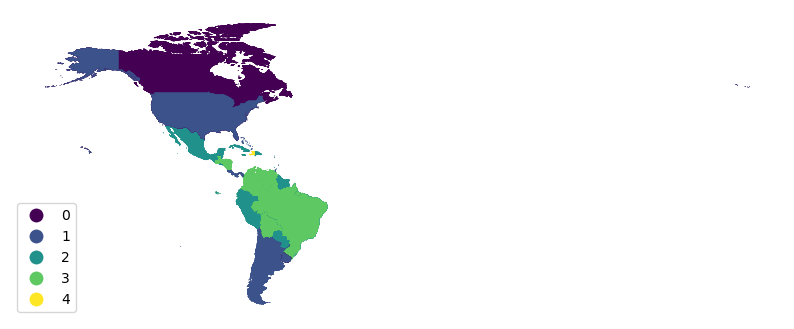

In [90]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
americas_df.plot(column='Total_ei5', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"}, 
        ax=ax
       )

ax.set_axis_off()

In [92]:
# Re-proyectar a un CRS proyectado adecuado
americas_df_projected = americas_df.to_crs('EPSG:5641')  # Ejemplo: EPSG 3395 es un CRS proyectado común para mapas mundiales

# Calcular los centroides de los países en americas_df_projected
centroides = americas_df_projected.centroid

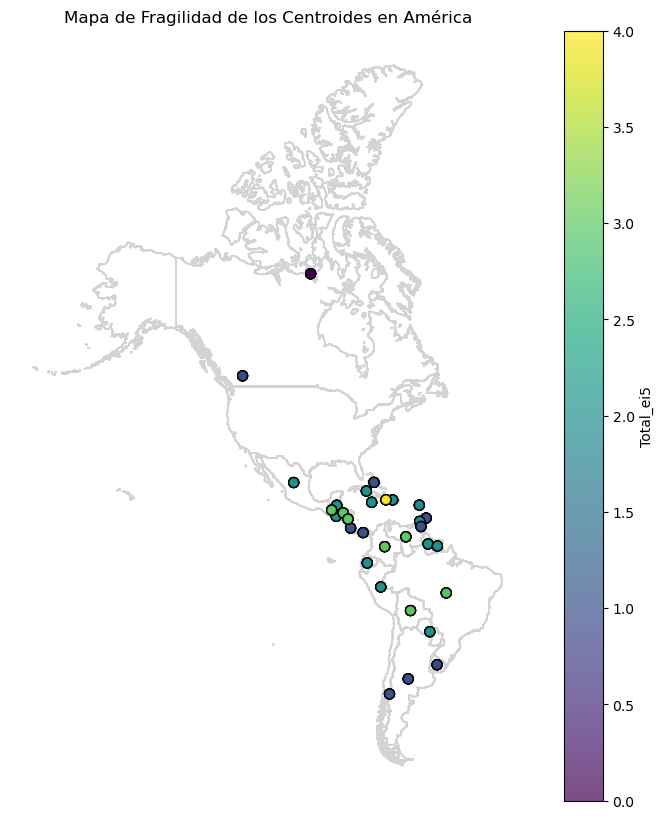

In [101]:
import matplotlib.pyplot as plt

# Crear una sola gráfica
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los países con color transparente
americas_df_projected.plot(ax=ax, color='none', edgecolor='lightgrey')

# Graficar los centroides con colores según la fragilidad (Total_ei5)
scatter = ax.scatter(centroides.x, centroides.y, c=americas_df['Total_ei5'], cmap='viridis', s=50, edgecolor='black', alpha=0.7, label='Centroides')

# Añadir título y leyenda
ax.set_title('Mapa de Fragilidad de los Centroides en América')

# Agregar barra de colores
cbar = plt.colorbar(scatter)
cbar.set_label('Total_ei5')

# Ocultar los ejes
ax.set_axis_off()

# Mostrar la gráfica
plt.show()